<a href="https://colab.research.google.com/github/FlaysonSantos/Matriz_de_Confusao/blob/main/Matriz_de_Confus%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import itertools



In [38]:


# 1 para verde, 0 para amarelo
valores_reais    = [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0]
valores_preditos = [1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

def get_confusion_matrix(reais, preditos, labels):

    # não implementado
    if len(labels) > 2:
        return None

    if len(reais) != len(preditos):
        return None
    
    # considerando a primeira classe como a positiva, e a segunda a negativa
    true_class = labels[0]
    negative_class = labels[1]

    # valores preditos corretamente
    tp = 0
    tn = 0
    
    # valores preditos incorretamente
    fp = 0
    fn = 0
    
    for (indice, v_real) in enumerate(reais):
        v_predito = preditos[indice]

        # se trata de um valor real da classe positiva
        if v_real == true_class:
            tp += 1 if v_predito == v_real else 0
            fp += 1 if v_predito != v_real else 0
        else:
            tn += 1 if v_predito == v_real else 0
            fn += 1 if v_predito != v_real else 0
    
    return np.array([
        # valores da classe positiva
        [ tp, fp ],
        # valores da classe negativa
        [ fn, tn ]
    ])

conf = metrics.confusion_matrix(valores_reais, valores_preditos, labels=[1,0])
conf





array([[ 4,  3],
       [ 3, 10]])

Text(0.5, 87.37999999999997, 'Predicted label')

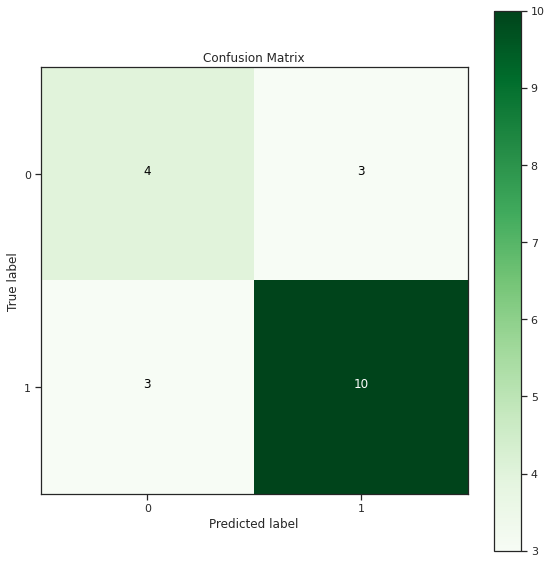

In [39]:
classes = [0, 1]
# plot confusion matrix
plt.imshow(conf, interpolation='nearest', cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conf.max() / 2.
for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
    plt.text(j, i, format(conf[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [40]:
# from the confusion matrix
TP = true_pos = 10
TN = true_neg = 4
FP = false_pos = 3
FN = false_neg = 3

# Algumas métricas básicas
Agora, vamos calcular algumas métricas básicas desses quatro valores.
Precisaremos de um dicionário para armazenar essas métricas. Vamos criar um dicionário results.

In [41]:
results = {}

# Precisão
número de exemplos previstos corretamente / número total de exemplos

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/c72ec21ef2505c2d376e96197637fc64f75e5891)

In [42]:
metric = "ACC"
results[metric] = (TP + TN) / (TP + TN + FP + FN)
print(f"{metric} e de {results[metric]: .3f}")

ACC e de  0.700


# Taxa de Verdadeiro Positivo
número de amostras reais e previsto como Positive/ número total de amostras reais Positive
Também chamado de **Sensibilidade ou Recuperação **.

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/64d5540cbadeb83f864d7a731b7ab43cccd0f353)

In [44]:
# Sensibilidade ou Recall
metric = "TPR"
results[metric] = TP / (TP + FN)
print(f"{metric} e de {results[metric]: .3f}")

TPR e de  0.769


# Taxa Negativa Verdadeira
número de amostras reais e previsto como Negative/número total de amostras reais Negative
Também chamado de **Especificidade** .

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/aac65b6586cb61c1268403895012c2a8f19b0c5e)


In [45]:
# Especificidade
metric = "TNR"
results[metric] = TN / (TN + FP)
print(f"{metric} e de {results[metric]: .3f}")

TNR e de  0.571


# Valor Preditivo Positivo
número de amostras realmente e previsto como Positive/ número total de amostras previsto como Positive
 Também chamado de **Precisão .**

 ![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/699fcdb880b7f6a92742bc0845b8b60b59806a98)

In [47]:
#  Precisão
metric = "PPV"
results[metric] = TP / (TP + FP)
print(f"{metric} e de {results[metric]: .3f}")

PPV e de  0.769


# Valor preditivo Negativo
número de amostras realmente e previsto como Negative/ número total de amostras previsto como **Negativo**

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/b6da0f59faffbc1704974e97847ab4fa599f5521)

In [48]:
metric = "NPV"
results[metric] = TN / (TN + FN)
print(f"{metric} e de  {results[metric]: .3f}")

NPV e de   0.571


# Pontuação F1 ou (F-SCORE)
Média Harmônica de Precisão e Recall.

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/5663ca95d471868169c4e4ea57c936f1b6f4a588)


In [51]:
metric = "F-SCORE"
results[metric] = 2 / (1 / results["PPV"] + 1 / results["TPR"])
print(f"{metric} e de {results[metric]: .3f}")

F-SCORE e de  0.769


# Coeficiente de correlação de Matthew
O coeficiente de Matthew varia entre [-1, 1]. 0geralmente significa previsões totalmente aleatórias. 1significa um classificador perfeito, enquanto um valor negativo ( [-1, 0)) sugere uma correlação negativa entre as previsões e os valores reais.
**Aqui' o formal para MCC**

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/5caa90fc15105b74b59a30bbc9cc2e5bd43a13b7)

In [52]:
metric = "MCC"
num = TP * TN - FP * FN
den = ((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)) ** 0.5
results[metric] = num / den
print(f"{metric} e de {results[metric]: .3f}")

MCC e de  0.341
